In [253]:
import numpy as np
import tensorflow as tf

In [254]:
np.random.seed(101)
tf.set_random_seed(101)

In [255]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [256]:
rand_b = np.random.uniform(0,100,(5,1))

In [257]:
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [258]:
a = tf.placeholder(tf.float32)

In [259]:
b = tf.placeholder(tf.float32)

In [260]:
add_op = a + b

In [261]:
mul_op = a * b

In [262]:
with tf.Session() as sess:
        add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
        mul_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})

In [263]:
print(add_result)
print(" \n ")
print(mul_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
 
 
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Sample Example

In [264]:
n_features = 10

In [265]:
n_dense_neurons = 3

In [266]:
x = tf.placeholder(tf.float32,(None,n_features))

In [267]:
w = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b = tf.Variable(tf.ones(n_dense_neurons))

In [268]:
xw = tf.matmul(x,w)

In [269]:
z = tf.add(xw,b)

In [270]:
a = tf.sigmoid(z)

In [271]:
init = tf.global_variables_initializer()

In [272]:
    with tf.Session() as sess:
        sess.run(init)
        layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [273]:
print(layer_out)

[[0.9549319  0.94979185 0.999655  ]]


# Simple Regression Example

In [274]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,-1.5,10)

In [275]:
x_data

array([-1.5       , -0.38888889,  0.72222222,  1.83333333,  2.94444444,
        4.05555556,  5.16666667,  6.27777778,  7.38888889,  8.5       ])

In [276]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [277]:
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

In [278]:
import matplotlib.pyplot as plt
%matplotlib inline

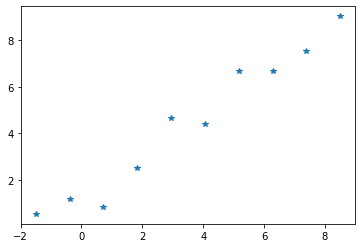

In [279]:
plt.plot(x_data,y_label,"*")

In [280]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [281]:
m = tf.Variable(0.22)
b = tf.Variable(0.04)

In [282]:
error = 0
for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    error += (y - y_hat)**2

In [283]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [284]:
init = tf.global_variables_initializer()

In [285]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
    final_slope,final_intercept = sess.run([m,b])

In [286]:
final_slope

0.9602917

In [287]:
final_intercept

0.84300005

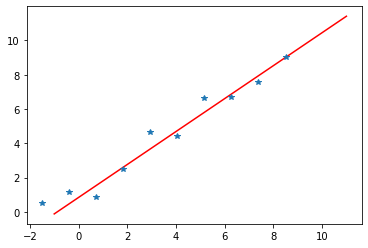

In [288]:
x_test = np.linspace(-1,11,10)
# y = mx + b
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')